DSA210 Fall 2025 Project - Ömer Berke Uzun 34335

# Import Modules and Read the dataset

Import the necessary modules and load the previously cleaned and merged dataset (check merger.py)

In [1]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the cleaned and merged dataset
merged_df = pd.read_csv("./Processed Data/merged_data.csv")

# Exploratory Data Analysis

In [3]:
print(f"Shape: {merged_df.shape}\n")
print(f"Dtypes:\n{merged_df.dtypes}")

Shape: (123, 16)

Dtypes:
Country                                     object
Density (P/Km2)                            float64
Birth Rate                                 float64
CPI                                        float64
CPI Change (%)                             float64
GDP                                        float64
Gross primary education enrollment (%)     float64
Gross tertiary education enrollment (%)    float64
Life expectancy                            float64
Total tax rate                             float64
Unemployment rate                          float64
Urban_population                           float64
Alcohol Total Per Capita Consumption       float64
Tobacco Use Estimate                       float64
Tobacco Regulation                          object
Alcohol Regulation                          object
dtype: object


In [4]:
print(merged_df.head())
print(merged_df.describe())

       Country  Density (P/Km2)  Birth Rate     CPI  CPI Change (%)  \
0  Afghanistan             60.0       32.49  149.90             2.3   
1      Albania            105.0       11.78  119.05             1.4   
2      Algeria             18.0       24.28  151.36             2.0   
3    Argentina             17.0       17.02  232.75            53.5   
4      Armenia            104.0       13.99  129.18             1.4   

            GDP  Gross primary education enrollment (%)  \
0  1.910135e+10                                   104.0   
1  1.527808e+10                                   107.0   
2  1.699882e+11                                   109.9   
3  4.496634e+11                                   109.7   
4  1.367280e+10                                    92.7   

   Gross tertiary education enrollment (%)  Life expectancy  Total tax rate  \
0                                      9.7             64.5            71.4   
1                                     55.0             78.5 

Distributions of Alcohol Consumption, and Tobacco Use:
- The histograms help visualize the distribution of alcohol and tobacco consumption
    - The Alcohol Consumption chart is right skewed which shows that most countries tend to drink relatively less alcohol while few with very high-consumption increase the average
        - This skewness might be due to income, regulations or other relevant factors which will be tested later on
    - The Tobacco Use Estimate chart is much closer to a symmetric shape with a broad plateau
        - This shape shows that Tobacco Use is more evenly distributed although with most countries still having smokers for every 5-10 people

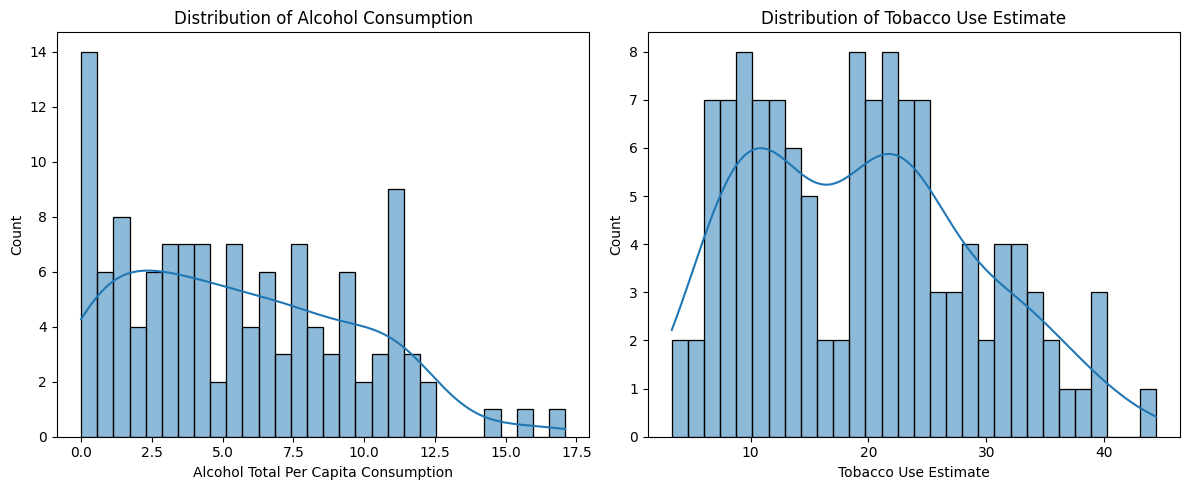

In [5]:
#Distributions of Alcohol Consumption, and Tobacco Use
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(merged_df["Alcohol Total Per Capita Consumption"], bins=30, ax=axes[0], kde=True)
axes[0].set_title("Distribution of Alcohol Consumption")
sns.histplot(merged_df["Tobacco Use Estimate"], bins=30, ax=axes[1], kde=True)
axes[1].set_title("Distribution of Tobacco Use Estimate")
plt.tight_layout()
plt.show()


Bar plot of how many countries enforce regulations:
- This plot shows the number of countries that have some form of regulation on alcohol and tobacco usage
    - The number of countries that have alcohol regulations are slightly higher than the number of ones that do not
        - This shows that alcohol is only moderately regulated with a sizeable number of countries lacking strong or formal regulations even when counting subnational policies as a form of regulation
    - Tobacco usage on the other hand shows very high number of countries with regulations
        - This shows that tobacco regulation is almost globalized with almost every country having some sort of regulation in place, much likely due to how tobacco is perceived as compared to alcohol
    - These are also in line with the previous graphs where alcohol usage was inconsistent with outliers while tobacco usage was more even which is likely due to these regulations

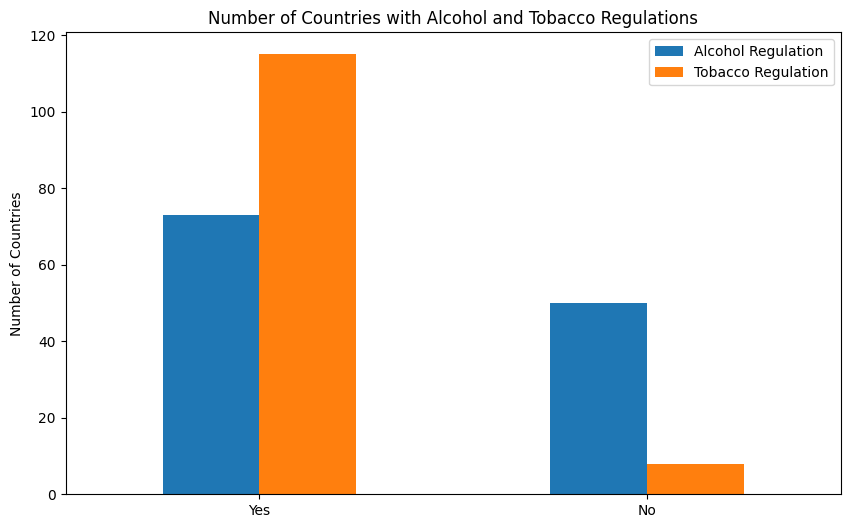

In [6]:
#Bar chart showing number of countries with alcohol and tobacco regulations
reg_counts = merged_df[["Alcohol Regulation", "Tobacco Regulation"]].apply(pd.Series.value_counts)
reg_counts.plot(kind="bar", figsize=(10, 6))
plt.title("Number of Countries with Alcohol and Tobacco Regulations")
plt.ylabel("Number of Countries")
plt.xticks(rotation=0)
plt.show()

Plotting regulations effect on consumption:
- This plot shows a surprising result in regulations effect on consumption
    - Seemingly, average usage of both alcohol and tobacco are actually higher for countries with regulations in place
    - This suggests a reverse relationship between these factors where instead of regulations lowering the usage of these substances, they are actually implemented when the usage of these substances are high
        - The plot actually shows that countries with low consumption of these substances do not see regulation as necessary while countries with high consumption start introducing regulations likely due to increased health concerns

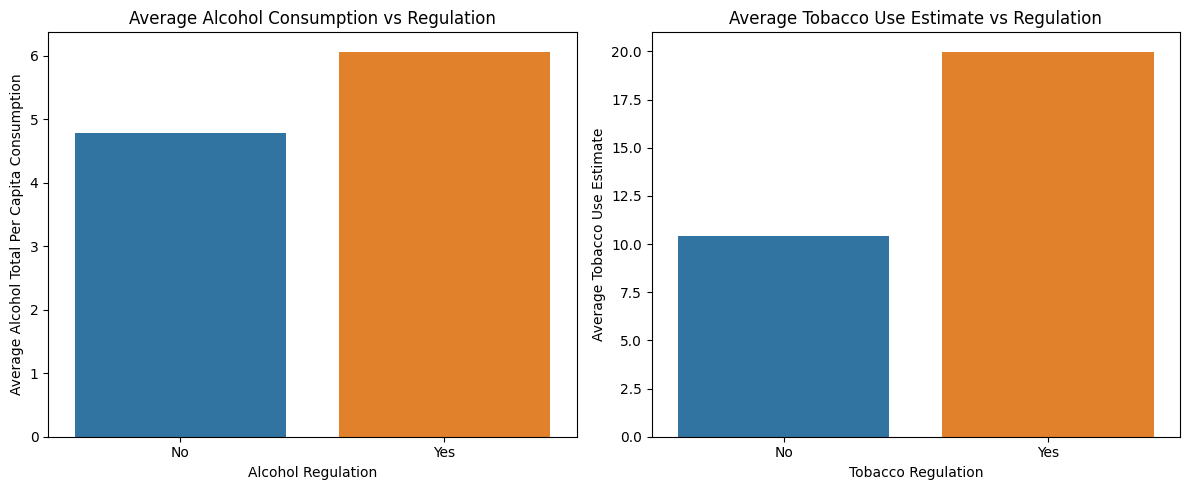

In [7]:
#Calculate means for Alcohol and Tobacco usage based on regulation
avg_alcohol_vs_reg = merged_df.groupby("Alcohol Regulation")["Alcohol Total Per Capita Consumption"].mean().sort_values()
avg_tobacco_vs_reg = merged_df.groupby("Tobacco Regulation")["Tobacco Use Estimate"].mean().sort_values()

#Plot the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=avg_alcohol_vs_reg.index, y=avg_alcohol_vs_reg.values, hue=avg_alcohol_vs_reg.index,legend=False)
plt.title("Average Alcohol Consumption vs Regulation")
plt.xlabel("Alcohol Regulation")
plt.ylabel("Average Alcohol Total Per Capita Consumption")

plt.subplot(1, 2, 2)
sns.barplot(x=avg_tobacco_vs_reg.index, y=avg_tobacco_vs_reg.values, hue=avg_tobacco_vs_reg.index,legend=False)
plt.title("Average Tobacco Use Estimate vs Regulation")
plt.xlabel("Tobacco Regulation")
plt.ylabel("Average Tobacco Use Estimate")
plt.tight_layout()
plt.show()

Scatterplots for relationship between alcohol and tobacco usage and various features:
- These scatterplots help show the relationship between alcohol and tobacco usage and the relevant feature
    - GDP:
        - GDP shows a low but positive correlation for alcohol consumption which is likely due to better affordability
        - There is almost no correlation between GDP and tobacco usage but the graph is seemingly in line with previous distributions of tobacco usage, likely due to high income countries having stricter regulations and lower income countries not having affordability
    - Gross tertiary education enrollment:
        - Highly educated countries seemingly tend to drink more but with large variability according to the plot which is likely due to drinking norms and correlation with income and urban lifestyle
        - A similar pattern is seen for tobacco use which actually shows that education by itself does not eliminate the consumption of these substances
    - Life expectancy:
        - Alcohol consumption also seemingly shows a positive trend with increased life expectancy which might seem counter-intuitive at first due to health risks, however life expectancy is a sign of a developed country which will most likely have an advanced healthcare system
        - The same can be seen for tobacco consumption which once again may seem counter-intuitive however it also benefits from development and advanced healthcare and it should also be noted that the harm caused by these substances have a lag and are chronic which causes high consumption to coexist with higher life expectancy
    - Unemployment rate:
        - There is seemingly no correlation between alcohol consumption and unemployment rate, likely due to unemployment rate not being enough to represent the stress levels of the population
        - The same can also be said for tobacco use where once again the short term economic stress caused by the unemployment rate is not very likely to cause an effect on tobacco use

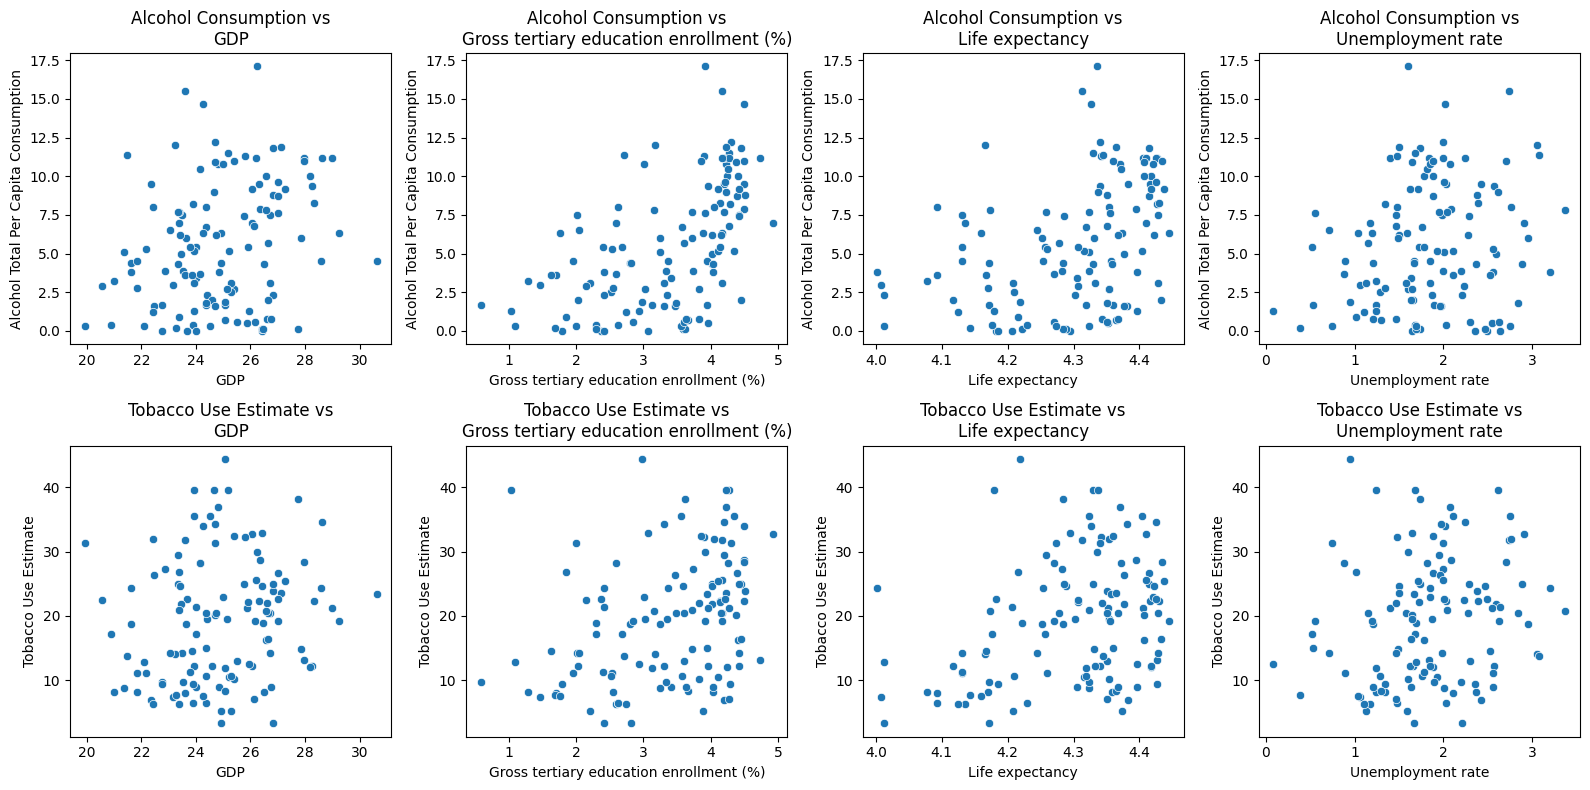

In [8]:
#Scaterplots for relationship between alcohol and tobacco usage and log of various features
features = ["GDP", "Gross tertiary education enrollment (%)", "Life expectancy", "Unemployment rate"]

plt.figure(figsize=(16, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(data=merged_df, x=np.log1p(merged_df[feature]), y="Alcohol Total Per Capita Consumption")
    plt.title(f"Alcohol Consumption vs\n{feature}")
    
    plt.subplot(2, 4, i+4)
    sns.scatterplot(data=merged_df, x=np.log1p(merged_df[feature]), y="Tobacco Use Estimate")
    plt.title(f"Tobacco Use Estimate vs\n{feature}")
    
plt.tight_layout()
plt.show()

Boxplot and Violinplots of Alcohol consumption and Tobacco use:
- The boxplot and violinplots are used to better show the distribution of alcohol and tobacco use
    - The boxplot of alcohol shows a roughly 5 Liters of pure alcohol consumption per capita, that is roughly 100 liters of beer per year on average, and it also shows a strong light skew with a upper whisker extending all the way to 17 Liters 
    - The violinplot of alcohol shows a high density at low levels of consumption with a long and thin upper tail which is in line with the previous findings
    - The boxplot of tobacco shows a roughly 20% usage of tobacco which means that 1 in every 5 person uses tobacco on average
    - The violinplot of tobacco provides similar findings to the boxplot with 2 density peaks and a wider upper tail as compared to alcohol which is in line with the previous more even distribution found

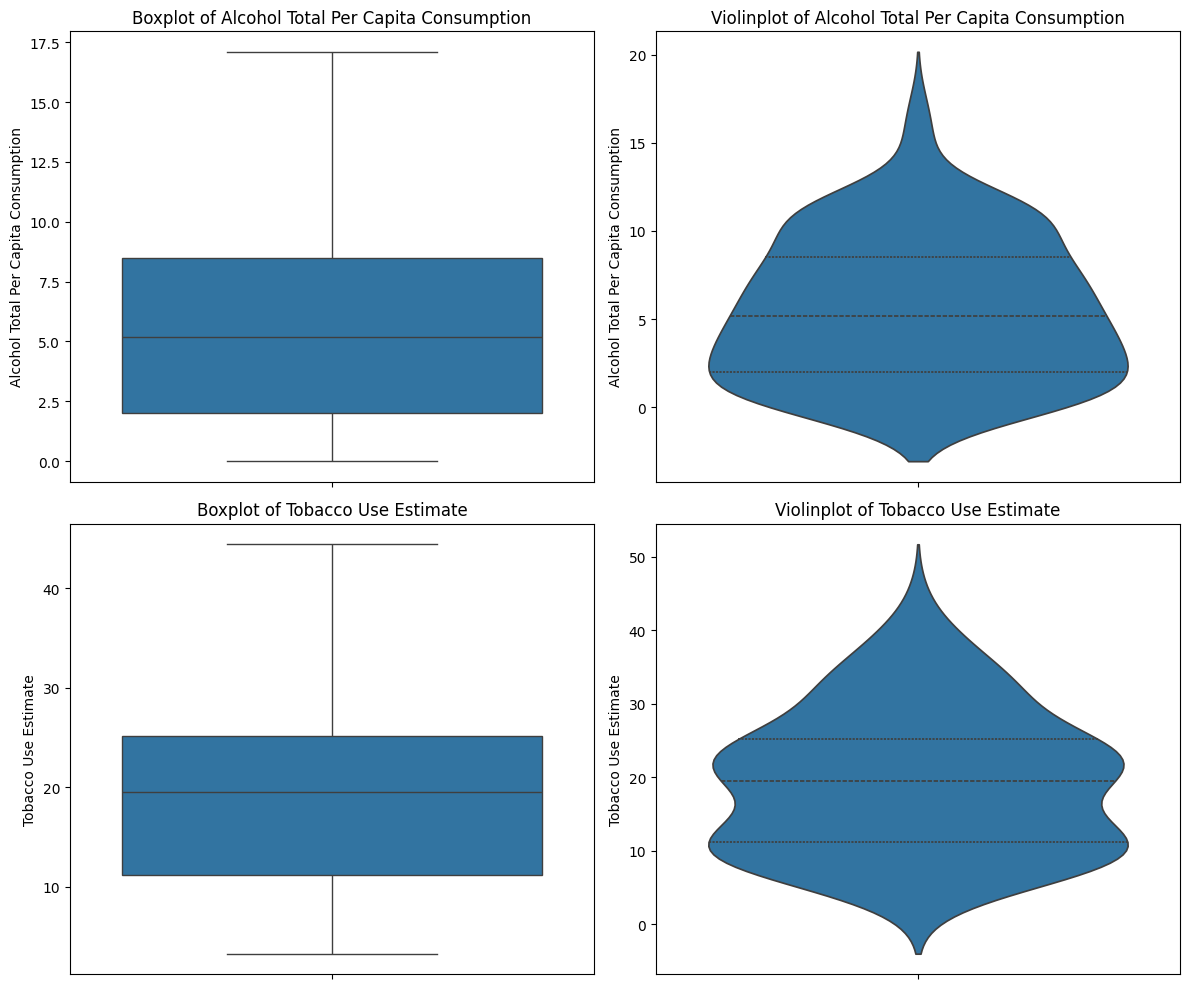

In [9]:
#Boxplot and Violinplots of Alcohol and Tobacco use

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=merged_df["Alcohol Total Per Capita Consumption"])
plt.title(f"Boxplot of Alcohol Total Per Capita Consumption")

plt.subplot(2, 2, 2)
sns.violinplot(y=merged_df["Alcohol Total Per Capita Consumption"], inner="quartile")
plt.title(f"Violinplot of Alcohol Total Per Capita Consumption")

plt.subplot(2, 2, 3)
sns.boxplot(y=merged_df["Tobacco Use Estimate"])
plt.title(f"Boxplot of Tobacco Use Estimate")

plt.subplot(2, 2, 4)
sns.violinplot(y=merged_df["Tobacco Use Estimate"], inner="quartile")
plt.title(f"Violinplot of Tobacco Use Estimate")

plt.tight_layout()
plt.show()

Correlation matrices:
- These matrices show how each value correlates with others based on Pearson and Spearman coefficients
    - Pearson matrix heatmap helps with determining linear relationships
    - Spearman matrix heatmap helps determining non-linear relationships as well
        - Both heatmaps show thath birth rate - life expectancy, tertiary education - life expectancy, GDP - urban population all have correlations which is to be expected based on the level of a country's development which also lends more credibility to the dataset
        - Alcohol consumption is seemingly correlated with tertiary education, life expectancy and birth rate, these correlations will be explored further during hypothesis testing
        - Alcohol consumption is also not that correlated with urban population, unemployment or tax rate likely showing that it is more dependant on long term social conditions and not short term economic ones
        - Tobacco usage with weaker correlations than alcohol is also correlated with birth rate, tertiary education and life expectancy
        - The reason for tobacco usage having weaker correlations in general is likely due to the heavier policies regarding its usage

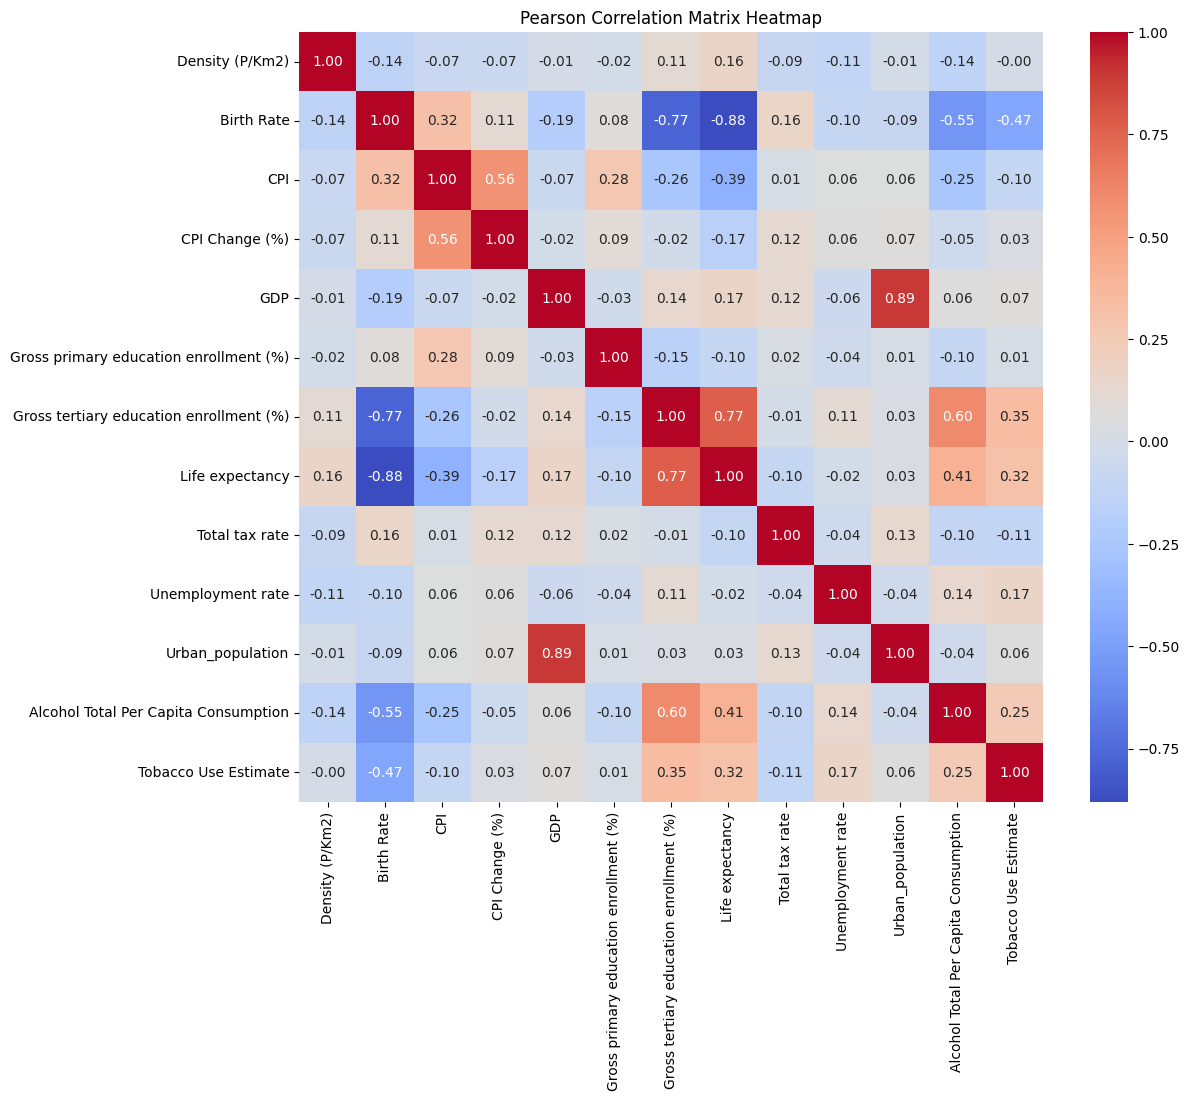

In [10]:
#Pearson correlation matrix heatmap of all numerical features
corr = merged_df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Pearson Correlation Matrix Heatmap")
plt.show()

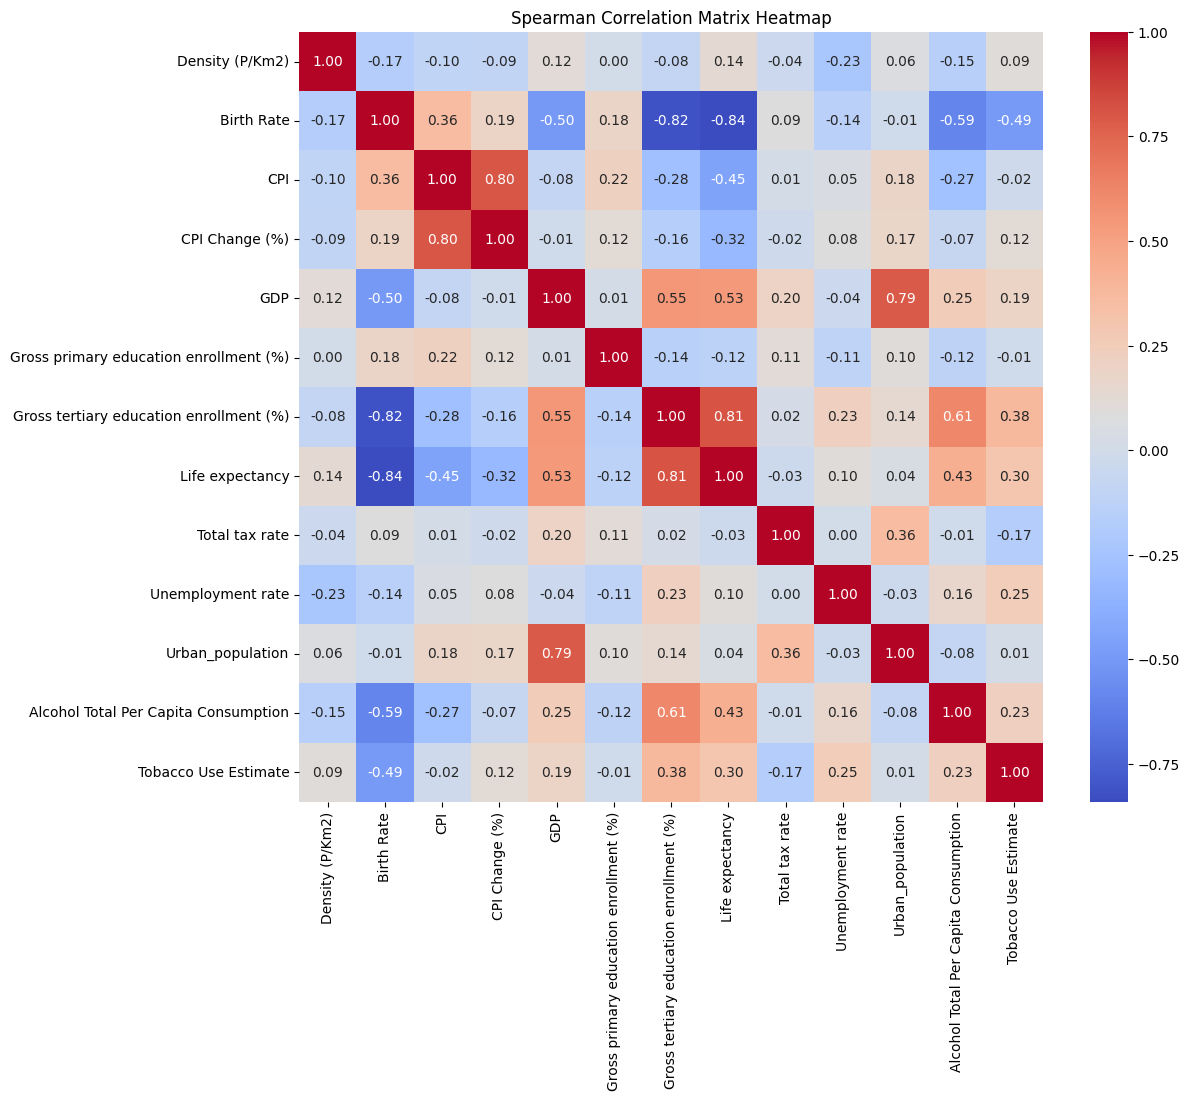

In [11]:
#Spearman correlation matrix heatmap of all numerical features
spearman_corr = merged_df.corr(method="spearman", numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix Heatmap")
plt.show()

# Hypothesis Tests

**Hypothesis Test 1: Gross Tertiary education enrollment and Alcohol Total Per Capita Consumption**   
 -H0: Gross Tertiary education enrollment and Alcohol Total Per Capita Consumption are not correlated.   
 -H1: Gross Tertiary education enrollment and Alcohol Total Per Capita Consumption are correlated

In [12]:
from scipy.stats import spearmanr

#Function to calculate spearman correlation coefficient for two variables and inform user of results
def spearman_correlation_analysis(x_var, y_var):
    spearman_r, spearman_p = spearmanr(x_var, y_var)

    #Print correlation results
    print(f"Spearman correlation between {x_var.name} and {y_var.name}: r = {spearman_r:.4f}, p-value = {spearman_p:.44f}")

    #There is correlation
    if spearman_p < 0.05:
        #Calculate correlation strength
        absspearman_r = abs(spearman_r)
        if absspearman_r < 0.2:
            strength = "very weak"
        elif absspearman_r < 0.4:
            strength = "weak"
        elif absspearman_r < 0.6:
            strength = "moderate"
        elif absspearman_r < 0.8:
            strength = "strong"
        else:
            strength = "very strong"

        #Positive correlation
        if spearman_r > 0:
            print(f"Reject the null hypothesis.\nThe correlation is statistically significant (p < 0.05) and is positive and {strength}.")
        #Negative correlation
        else:
            print(f"Reject the null hypothesis.\nThe correlation is statistically significant (p < 0.05) and is negative and {strength}.")
    #No correlation
    else:
        print("Fail to reject the null hypothesis.\nNo statistically significant correlation found (p >= 0.05).")

#Run spearman_correlation_analysis for Gross Tertiary education enrollment and Alcohol Total Per Capita Consumption
x_var = merged_df["Gross tertiary education enrollment (%)"]
y_var = merged_df["Alcohol Total Per Capita Consumption"]
spearman_correlation_analysis(x_var, y_var)

Spearman correlation between Gross tertiary education enrollment (%) and Alcohol Total Per Capita Consumption: r = 0.6144, p-value = 0.00000000000004070576016826558100420447533859
Reject the null hypothesis.
The correlation is statistically significant (p < 0.05) and is positive and strong.


**Interpretation:**<br>
- Results show that the p-value is low enough to reject the null hypothesis which means there is a strong and positive correlation between Gross tertiary education enrollment and Alcohol Total Per Capita Consumption<br>
    - This is likely due to education correlating with higher income and urban lifestyle along with drinking norms introduced with higher education

**Hypothesis Test 2: Gross Tertiary education enrollment and Tobacco Use Estimate**   
 -H0: Gross Tertiary education enrollment and Tobacco Use Estimate are not correlated.   
 -H1: Gross Tertiary education enrollment and Tobacco Use Estimate are correlated

In [13]:
#Run spearman_correlation_analysis for Gross Tertiary education enrollment and Tobacco Use Estimate
x_var = merged_df["Gross tertiary education enrollment (%)"]
y_var = merged_df["Tobacco Use Estimate"]
spearman_correlation_analysis(x_var, y_var)

Spearman correlation between Gross tertiary education enrollment (%) and Tobacco Use Estimate: r = 0.3809, p-value = 0.00001381036884722625871640966366271641163621
Reject the null hypothesis.
The correlation is statistically significant (p < 0.05) and is positive and weak.


**Interpretation:**<br>
- Results show that the p-value is low enough to reject the null hypothesis but the r value is low enough to indicate a positive but weak correlation between Gross tertiary education enrollment and Tobacco Use Estimate
    - This is likely due to education correlating with higher income and urban lifestyle which in turn increases tobacco usage

**Hypothesis Test 3: Unemployment Rate and Alcohol Total Per Capita Consumption**   
 -H0: Unemployment Rate and Alcohol Total Per Capita Consumption are not correlated.   
 -H1: Unemployment Rate and Alcohol Total Per Capita Consumption are correlated

In [14]:
#Run spearman_correlation_analysis for Unemployment Rate and Alcohol Total Per Capita Consumption
x_var = merged_df["Unemployment rate"]
y_var = merged_df["Alcohol Total Per Capita Consumption"]
spearman_correlation_analysis(x_var, y_var)

Spearman correlation between Unemployment rate and Alcohol Total Per Capita Consumption: r = 0.1601, p-value = 0.07700070031427859451600426154982415027916431
Fail to reject the null hypothesis.
No statistically significant correlation found (p >= 0.05).


**Interpretation:**<br>
- Results show that the p-value is not low enough to reject the null hypothesis which means there is no statistically significant correlation between Unemployment Rate and Alcohol Total Per Capita Consumption
    - This is likely due to unemployment rate not being enough to represent the stress levels of the population and short term economic stress caused by the unemployment rate not being likely to cause an effect on alcohol consumption

**Hypothesis Test 4: Unemployment Rate and Tobacco Use Estimate**   
 -H0: Unemployment Rate and Tobacco Use Estimate are not correlated.   
 -H1: Unemployment Rate and Tobacco Use Estimate are correlated

In [15]:
#Run spearman_correlation_analysis for Unemployment Rate and Tobacco Use Estimate
x_var = merged_df["Unemployment rate"]
y_var = merged_df["Tobacco Use Estimate"]
spearman_correlation_analysis(x_var, y_var)

Spearman correlation between Unemployment rate and Tobacco Use Estimate: r = 0.2472, p-value = 0.00583339327387159475857281165644963039085269
Reject the null hypothesis.
The correlation is statistically significant (p < 0.05) and is positive and weak.


**Interpretation:**<br>
- Results show that the p-value is low enough to reject the null hypothesis but the r value is low enough to indicate a positive but weak correlation between Unemployment Rate and Tobacco Use Estimate
    - This correlation shows that the stress caused by unemployment does effect tobacco use, even though it is weak

**Hypothesis Test 5: Birth Rate and Alcohol Total Per Capita Consumption**   
 -H0: Birth Rate and Alcohol Total Per Capita Consumption are not correlated.   
 -H1: Birth Rate and Alcohol Total Per Capita Consumption are correlated.

In [16]:
#Run spearman_correlation_analysis for Birth Rate and Alcohol Total Per Capita Consumption
x_var = merged_df["Birth Rate"]
y_var = merged_df["Alcohol Total Per Capita Consumption"]
spearman_correlation_analysis(x_var, y_var)

Spearman correlation between Birth Rate and Alcohol Total Per Capita Consumption: r = -0.5935, p-value = 0.00000000000046591517730011336083978090526297
Reject the null hypothesis.
The correlation is statistically significant (p < 0.05) and is negative and moderate.


**Interpretation:**<br>
- Results show that the p-value is low enough to reject the null hypothesis with a decent r value to indicate a negative and moderate correlation between Birth Rate and Alcohol Total Per Capita Consumption
    - This is likely due to correlation of lower income with higher birth rate and the cultures of countries with higher birth rates discouraging alcohol use

**Hypothesis Test 6: Birth Rate and Tobacco Use Estimate**   
 -H0: Birth Rate and Tobacco Use Estimate are not correlated.   
 -H1: Birth Rate and Tobacco Use Estimate are correlated

In [17]:
#Run spearman_correlation_analysis for Birth Rate and Tobacco Use Estimate
x_var = merged_df["Birth Rate"]
y_var = merged_df["Tobacco Use Estimate"]
spearman_correlation_analysis(x_var, y_var)

Spearman correlation between Birth Rate and Tobacco Use Estimate: r = -0.4909, p-value = 0.00000000820741608105041937865484815697522669
Reject the null hypothesis.
The correlation is statistically significant (p < 0.05) and is negative and moderate.


**Interpretation:**<br>
- Results show that the p-value is low enough to reject the null hypothesis with a decent r value to indicate a negative and moderate correlation between Birth Rate and Tobacco Use Estimate
    - This is likely due to correlation of lower income with higher birth rate and the cultures of countries with higher birth rates discouraging tobacco use just like alcohol use

**Hypothesis Test 7: Alcohol Regulation and Alcohol Total Per Capita Consumption**   
 -H0: There is no difference in Alcohol Total per Capita Consumption between countries with and without regulation.   
 -H1: Alcohol Total per Capita Consumption differs between countries with and without regulation.

In [18]:
from scipy.stats import mannwhitneyu

#Mann-whitney U test comparing alcohol consumption between countries with and without alcohol regulations
group_with_reg = merged_df[merged_df["Alcohol Regulation"] == "Yes"]["Alcohol Total Per Capita Consumption"]
group_without_reg = merged_df[merged_df["Alcohol Regulation"] == "No"]["Alcohol Total Per Capita Consumption"]
u_stat, p_value = mannwhitneyu(group_with_reg, group_without_reg)

#Print results to user
print(f"Mann-Whitney U Test:\nU-statistic: {u_stat}\npValue: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis.")
    #Check positive vs. negative correlation
    if group_with_reg.mean() < group_without_reg.mean():
        print("Countries with alcohol regulations have significantly lower alcohol consumption than those without regulations.")
    else:
        print("Countries with alcohol regulations have significantly higher alcohol consumption than those without regulations.")
else:
    print("Fail to reject the null hypothesis. No significant difference in alcohol consumption between countries with and without alcohol regulations.")

Mann-Whitney U Test:
U-statistic: 2200.5
pValue: 0.05346465489280927
Fail to reject the null hypothesis. No significant difference in alcohol consumption between countries with and without alcohol regulations.


**Interpretation:**<br>
- Results show that the p-value is not low enough to reject the null hypothesis which means there is no significant difference in Alcohol Total per Capita Consumption between countries with and without alcohol regulations
    - This likely due to alcohol not being as heavily regulated as tobacco and it being too general by itself, due to ignoring multiple factors such as income, to show any differences

**Hypothesis Test 8: Tobacco Regulation and Tobacco Use Estimate**   
 -H0: There is no difference in Tobacco Use Estimate between countries with and without regulation.   
 -H1: Tobacco Use Estimate differs between countries with and without regulation.

In [19]:
#Mann-whitney U test comparing tobacco use between countries with and without tobacco regulations
group_with_reg = merged_df[merged_df["Tobacco Regulation"] == "Yes"]["Tobacco Use Estimate"]
group_without_reg = merged_df[merged_df["Tobacco Regulation"] == "No"]["Tobacco Use Estimate"]
u_stat, p_value = mannwhitneyu(group_with_reg, group_without_reg, alternative="two-sided")

#Print results to user
print(f"Mann-Whitney U Test:\nU-statistic: {u_stat}\npValue: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis.")
    #Check positive vs. negative correlation
    if group_with_reg.median() < group_without_reg.median():
        print("Countries with tobacco regulations have significantly lower tobacco use estimates than those without regulations.")
    else:
        print("Countries with tobacco regulations have significantly higher tobacco use estimates than those without regulations.")
else:
    print("Fail to reject the null hypothesis. No significant difference in alcohol consumption between countries with and without alcohol regulations.")

Mann-Whitney U Test:
U-statistic: 735.0
pValue: 0.004870622044438068
Reject the null hypothesis.
Countries with tobacco regulations have significantly higher tobacco use estimates than those without regulations.


**Interpretation:**<br>
- Results show that the p-value is low enough to reject the null hypothesis which means countries with tobacco regulations have significantly higher tobacco use estimates than those without regulations
    - This counter-intuitive result was discussed previously and is a case of survivorship bias where countries with lower tobacco use do not need regulations as regulations are reactive which means they are introduced after usage becomes a problem

# Machine Learning

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Set a consistent style for later plots
sns.set(style="whitegrid")

In [21]:
#Prepare dataset for ML
merged_df = merged_df.replace({"Yes" : 1, "No" : 0}).drop(columns=["Country"])
x = merged_df.drop(columns=["Alcohol Total Per Capita Consumption","Tobacco Use Estimate"])
y1 = merged_df["Alcohol Total Per Capita Consumption"]
y2 = merged_df["Tobacco Use Estimate"]

#Cross validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

rmse_vals_alc = {}
r2_vals_alc = {}
rmse_vals_tob = {}
r2_vals_tob = {}

C:\Users\omerb\AppData\Local\Temp\ipykernel_6500\144664862.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df = merged_df.replace({"Yes" : 1, "No" : 0}).drop(columns=["Country"])


**Linear, Ridge and Lasso Regression models**
- Linear Regression
    - The linear model only provides a baseline for both targets especially considering the results
    - Both alcohol and especially tobacco have relatively low R^2 scores and high RMSE's showing that there are weak linear relationships between the predictors and targets showing purely linear relationships are insufficient to explain the targets
- Ridge Regression
    - Ridge does show a mild improvement over linear regression likely indicating a mild multicollinearity among predictors
    - Low R^2 values still show that this model is also limited by linear relationship assumptions
- Lasso Regression
    - Lasso performs similarly to ridge regression with a slightly better performance on Tobacco Usage likely showing that some predictors are redundant
    - Even then it does not drastically outperform the ridge model and still has relatively low score

In [22]:
models = {
    "Linear" : LinearRegression(),
    "Ridge" : Ridge(alpha=1.0),
    "Lasso" : Lasso(alpha=0.01)
}

#Train models on predicting Alcohol Consumption
for name, model in models.items():
    pipeline = Pipeline([("scaler", StandardScaler()),
                         ("model", model)
                         ])

    y_pred = cross_val_predict(pipeline, x, y1, cv=cv)

    rmse = root_mean_squared_error(y1,y_pred)
    rmse_vals_alc[name] = rmse
    r2 = r2_score(y1, y_pred)
    r2_vals_alc[name] = r2
    print(f"10-fold RMSE of {name} for Alcohol Consumption: {rmse:.4f}")
    print(f"R2 of {name}: {r2:.4f}\n")

#Train models on predicting Tobacco Usage
for name, model in models.items():
    pipeline = Pipeline([("scaler", StandardScaler()),
                         ("model", model)
                         ])

    y_pred = cross_val_predict(pipeline, x, y2, cv=cv)

    rmse = root_mean_squared_error(y2,y_pred)
    rmse_vals_tob[name] = rmse
    r2 = r2_score(y2, y_pred)
    r2_vals_tob[name] = r2
    print(f"10-fold RMSE of {name} for Tobacco Usage: {rmse:.4f}")
    print(f"R2 of {name}: {r2:.4f}\n")

10-fold RMSE of Linear for Alcohol Consumption: 3.4334
R2 of Linear: 0.2626

10-fold RMSE of Ridge for Alcohol Consumption: 3.3766
R2 of Ridge: 0.2868

10-fold RMSE of Lasso for Alcohol Consumption: 3.3944
R2 of Lasso: 0.2793

10-fold RMSE of Linear for Tobacco Usage: 8.9059
R2 of Linear: 0.1273

10-fold RMSE of Ridge for Tobacco Usage: 8.8825
R2 of Ridge: 0.1319

10-fold RMSE of Lasso for Tobacco Usage: 8.8711
R2 of Lasso: 0.1341



**k-Nearest Neighbors (kNN) model**
- kNN performing better than the linear regression models implies the existance of a nonlinear structure
- The difference in the k values between Alcohol Consumption and Tobacco Usage show that Alcohol usage has a smoother trend with a larger k while Tobacco has more local variability with a lower k

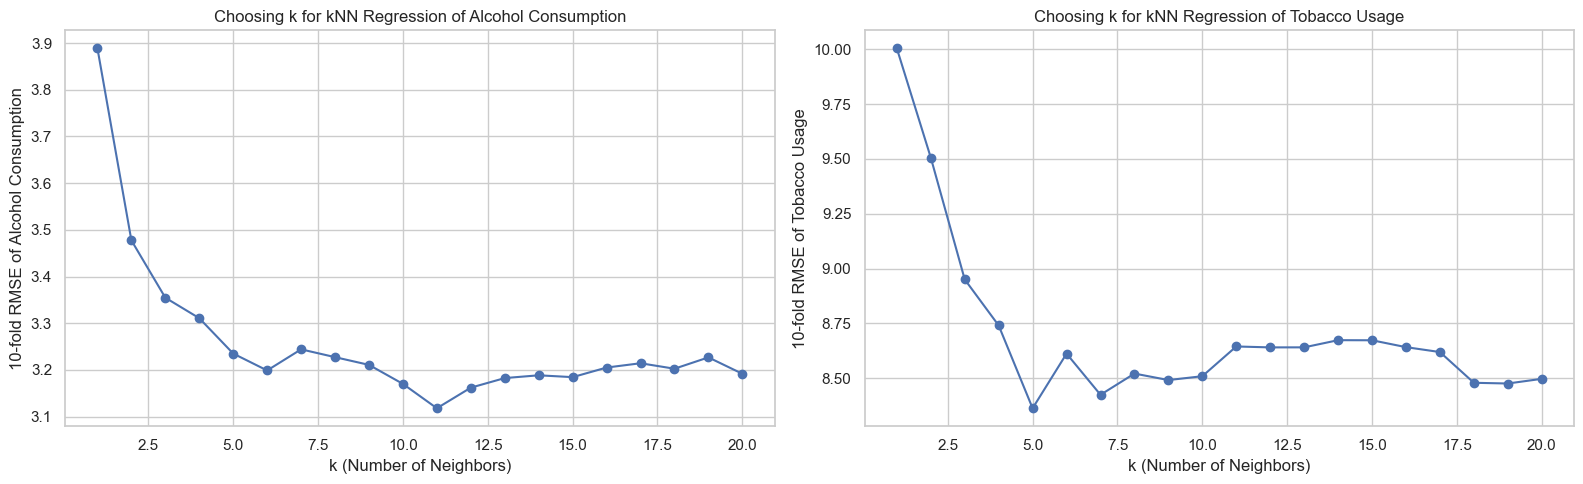

Best k for Alcohol Consumption: 11
10-fold RMSE of kNN for Alcohol Consumption: 3.1179
R2 of kNN for Alcohol Consumption: 0.3963
Best k for Tobacco Usage: 5
10-fold RMSE of kNN for Tobacco Usage: 8.3632
R2 of kNN for Tobacco Usage: 0.2326


In [23]:
k_values = list(range(1,21))
cv_scores_alc = []
cv_scores_tob = []

#Train kNN on predicting Alcohol Consumption
for k in k_values:
    pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=k))
    ])

    scores_alc = cross_val_score(pipeline, x, y1, cv=cv, scoring="neg_mean_squared_error")
    cv_scores_alc.append(np.sqrt(-scores_alc.mean()))

#Train kNN on predicting Tobacco Usage
for k in k_values:
    pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=k))
    ])

    scores_tob = cross_val_score(pipeline, x, y2, cv=cv, scoring="neg_mean_squared_error")
    cv_scores_tob.append(np.sqrt(-scores_tob.mean()))

#Plots
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.plot(k_values, cv_scores_alc, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("10-fold RMSE of Alcohol Consumption")
plt.title("Choosing k for kNN Regression of Alcohol Consumption")
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(k_values, cv_scores_tob, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("10-fold RMSE of Tobacco Usage")
plt.title("Choosing k for kNN Regression of Tobacco Usage")
plt.grid(True)

plt.tight_layout()
plt.show()

#Calculate R2 for Alcohol Consumption based on best model
best_k = k_values[np.argmin(cv_scores_alc)]
best_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=best_k))
])
y_pred = cross_val_predict(best_knn, x, y1, cv=cv)
r2_knn_alc = r2_score(y1, y_pred)

rmse_vals_alc["kNN"] = min(cv_scores_alc)
r2_vals_alc["kNN"] = r2_knn_alc

print(f"Best k for Alcohol Consumption: {best_k}")
print(f"10-fold RMSE of kNN for Alcohol Consumption: {min(cv_scores_alc):.4f}")
print(f"R2 of kNN for Alcohol Consumption: {r2_knn_alc:.4f}")

#Calculate R2 for Tobacco Usage based on best model
best_k = k_values[np.argmin(cv_scores_tob)]
best_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=best_k))
])
y_pred = cross_val_predict(best_knn, x, y2, cv=cv)
r2_knn_tob = r2_score(y2, y_pred)

rmse_vals_tob["kNN"] = min(cv_scores_tob)
r2_vals_tob["kNN"] = r2_knn_tob

print(f"Best k for Tobacco Usage: {best_k}")
print(f"10-fold RMSE of kNN for Tobacco Usage: {min(cv_scores_tob):.4f}")
print(f"R2 of kNN for Tobacco Usage: {r2_knn_tob:.4f}")

**Decision Tree**
- Results show that very shallow trees perform best with optimal max depth 1 for Alcohol Consumption and 3 for Tobacco Usage
    - This implies that there are no complex interactions between the features and their relationships are mostly monotonic or linear
- Decision trees reveal that the underlying structure is very simple but single trees are too robust
- The performance of the tree remains limited due to its high variance

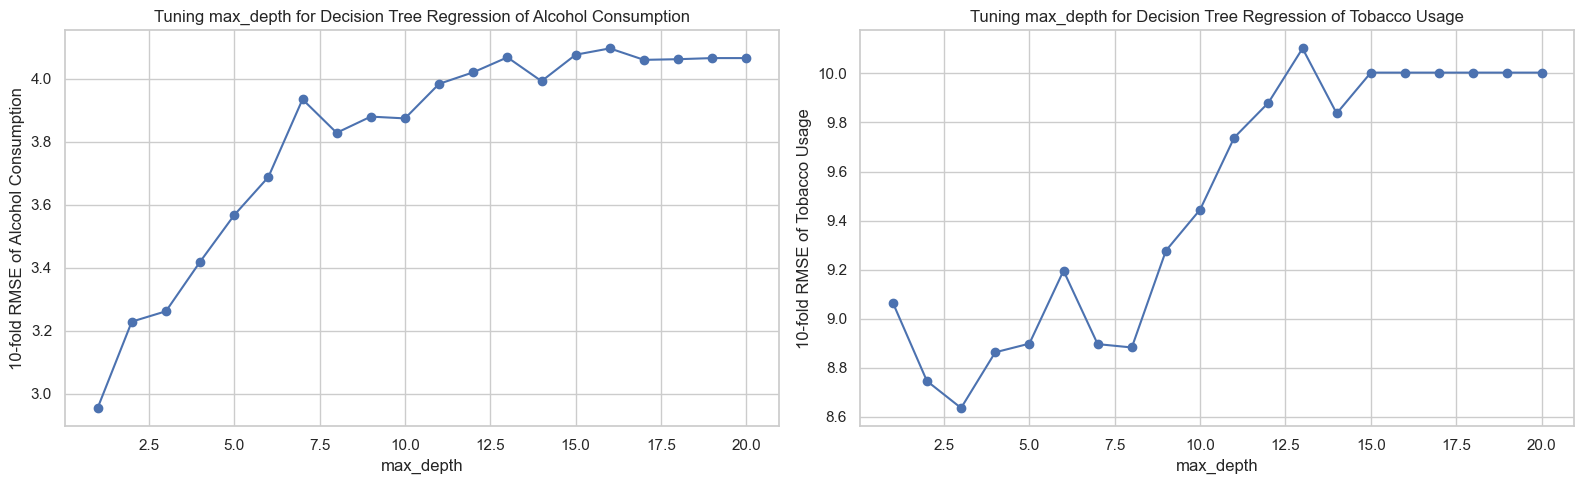

Best max_depth for Alcohol Consumption: 1
10-fold RMSE of decision tree for Alcohol Consumption: 2.9548
R2 of decision tree for Alcohol Consumption: 0.4543
Best max_depth for Tobacco Usage: 3
10-fold RMSE of decision tree for Tobacco Usage: 8.6351
R2 of decision tree for Tobacco Usage: 0.1772


In [24]:
depths = list(range(1,21))
cv_scores_alc = []
cv_scores_tob = []

#Train decision tree on predicting Alcohol Consumption
for d in depths:
    tree = DecisionTreeRegressor(max_depth=d, random_state=42)
    scores_alc = cross_val_score(tree, x, y1, cv=cv, scoring="neg_mean_squared_error")
    cv_scores_alc.append(np.sqrt(-scores_alc.mean()))

#Train decision tree on predicting Tobacco Usage
for d in depths:
    tree = DecisionTreeRegressor(max_depth=d, random_state=42)
    scores_tob = cross_val_score(tree, x, y2, cv=cv, scoring="neg_mean_squared_error")
    cv_scores_tob.append(np.sqrt(-scores_tob.mean()))

#Plots
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.plot(depths, cv_scores_alc, marker='o')
plt.xlabel("max_depth")
plt.ylabel("10-fold RMSE of Alcohol Consumption")
plt.title("Tuning max_depth for Decision Tree Regression of Alcohol Consumption")
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(depths, cv_scores_tob, marker='o')
plt.xlabel("max_depth")
plt.ylabel("10-fold RMSE of Tobacco Usage")
plt.title("Tuning max_depth for Decision Tree Regression of Tobacco Usage")
plt.grid(True)

plt.tight_layout()
plt.show()

#Calculate R2 for Alcohol Consumption based on best model
best_depth = depths[np.argmin(cv_scores_alc)]
best_tree = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
y_pred = cross_val_predict(best_tree,x,y1,cv=cv)
r2_tree_alc = r2_score(y1,y_pred)

rmse_vals_alc["tree"] = min(cv_scores_alc)
r2_vals_alc["tree"] = r2_tree_alc

print(f"Best max_depth for Alcohol Consumption: {best_depth}")
print(f"10-fold RMSE of decision tree for Alcohol Consumption: {min(cv_scores_alc):.4f}")
print(f"R2 of decision tree for Alcohol Consumption: {r2_tree_alc:.4f}")

#Calculate R2 for Tobacco Usage based on best model
best_depth = depths[np.argmin(cv_scores_tob)]
best_tree = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
y_pred = cross_val_predict(best_tree,x,y2,cv=cv)
r2_tree_tob = r2_score(y2,y_pred)

rmse_vals_tob["tree"] = min(cv_scores_tob)
r2_vals_tob["tree"] = r2_tree_tob

print(f"Best max_depth for Tobacco Usage: {best_depth}")
print(f"10-fold RMSE of decision tree for Tobacco Usage: {min(cv_scores_tob):.4f}")
print(f"R2 of decision tree for Tobacco Usage: {r2_tree_tob:.4f}")


**Random Forest**
- Random forest significantly improves over single decision trees and kNN
- The optimal hyperparameters being identical for both targets indicate that both targets benefit from relatively deep trees when variance is controlled
- The strong performance of the model is due to it reducing the variance of individual trees, its ability to capture weak nonlinear relationships and it being robust to noise and feature interactions

In [25]:
depths = [3, 5, 10, 15]
estimators = [10, 50, 100]
results_alc = {}
results_tob = {}

#Train random forest on Alcohol Consumption
for d in depths:
    for n in estimators:
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=42)
        scores_alc = cross_val_score(rf, x, y1, cv=cv, scoring="neg_mean_squared_error")
        results_alc[(d,n)] = np.sqrt(-scores_alc.mean())

#Train random forest on Tobacco Usage
for d in depths:
    for n in estimators:
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=42)
        scores_tob = cross_val_score(rf, x, y2, cv=cv, scoring="neg_mean_squared_error")
        results_tob[(d,n)] = np.sqrt(-scores_tob.mean())

#Calculate R2 for Alcohol Consumption based on best model
best_params = min(results_alc, key=results_alc.get)
best_rf = RandomForestRegressor(max_depth=best_params[0],n_estimators=best_params[1],random_state=42)
y_pred = cross_val_predict(best_rf,x,y1,cv=cv)
r2_rf_alc = r2_score(y1,y_pred)

rmse_vals_alc["forest"] = results_alc[best_params]
r2_vals_alc["forest"] = r2_rf_alc

print(f"Best max_depth for Alcohol Consumption: {best_params[0]}, Best n_estimators for Alcohol Consumption: {best_params[1]}")
print(f"Best 10-fold RMSE for Alcohol Consumption: {results_alc[best_params]:.4f}")
print(f"R2 for Alcohol Consumption: {r2_rf_alc:.4f}")

#Calculate R2 for Tobacco Usage based on best model
best_params = min(results_tob, key=results_tob.get)
best_rf = RandomForestRegressor(max_depth=best_params[0],n_estimators=best_params[1],random_state=42)
y_pred = cross_val_predict(best_rf,x,y2,cv=cv)
r2_rf_tob = r2_score(y2,y_pred)

rmse_vals_tob["forest"] = results_tob[best_params]
r2_vals_tob["forest"] = r2_rf_tob

print(f"Best max_depth for Tobacco Usage: {best_params[0]}, Best n_estimators for Tobacco Usage: {best_params[1]}")
print(f"Best 10-fold RMSE for Tobacco Usage: {results_tob[best_params]:.4f}")
print(f"R2 for Tobacco Usage: {r2_rf_tob:.4f}")

Best max_depth for Alcohol Consumption: 15, Best n_estimators for Alcohol Consumption: 100
Best 10-fold RMSE for Alcohol Consumption: 2.8411
R2 for Alcohol Consumption: 0.4965
Best max_depth for Tobacco Usage: 15, Best n_estimators for Tobacco Usage: 100
Best 10-fold RMSE for Tobacco Usage: 7.8373
R2 for Tobacco Usage: 0.3204


**XGBoost**
- XGBoost is the best performing model for both Alcohol Consumption and Tobacco Usage
- The model outperforms random forest by better handling the weak and structured nonlinearities

In [26]:
param_grid = {
    "max_depth": [2, 3, 4],
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.03, 0.05, 0.1]
}

xgb = XGBRegressor(subsample=0.8,colsample_bytree=0.8,reg_alpha=1.0,reg_lambda=1.0,random_state=42,objective="reg:squarederror")

gs_alc = GridSearchCV(estimator=xgb,param_grid=param_grid,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
gs_tob = GridSearchCV(estimator=xgb,param_grid=param_grid,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)

gs_alc.fit(x, y1)
gs_tob.fit(x, y2)

#Calculate RMSE and R2 for Alcohol Consumption based on best model
best_model = gs_alc.best_estimator_
y_pred = cross_val_predict(best_model,x,y1,cv=cv)
rmse_alc = root_mean_squared_error(y1,y_pred)
r2_xgb_alc = r2_score(y1,y_pred)

#Calculate RMSE and R2 for Tobacco Usage based on best model
best_model = gs_tob.best_estimator_
y_pred = cross_val_predict(best_model,x,y2,cv=cv)
rmse_tob = root_mean_squared_error(y2,y_pred)
r2_xgb_tob = r2_score(y2,y_pred)

rmse_vals_alc["xgb"] = rmse_alc
r2_vals_alc["xgb"] = r2_xgb_alc
rmse_vals_tob["xgb"] = rmse_tob
r2_vals_tob["xgb"] = r2_xgb_tob

print("Best params for Alcohol Consumption:", gs_alc.best_params_)
print(f"Final XGBoost 10-fold RMSE for Alcohol Consumption: {rmse_alc:.4f}")
print(f"Final XGBoost R2 for Alcohol Consumption: {r2_xgb_alc:.4f}")
print("Best params for Tobacco Usage:", gs_tob.best_params_)
print(f"Final XGBoost 10-fold RMSE for Tobacco Usage: {rmse_tob:.4f}")
print(f"Final XGBoost R2 for Tobacco Usage: {r2_xgb_tob:.4f}")

Best params for Alcohol Consumption: {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 200}
Final XGBoost 10-fold RMSE for Alcohol Consumption: 2.7246
Final XGBoost R2 for Alcohol Consumption: 0.5356
Best params for Tobacco Usage: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}
Final XGBoost 10-fold RMSE for Tobacco Usage: 7.6254
Final XGBoost R2 for Tobacco Usage: 0.3602


# Results

**Performance Comparison Table**
- As mentioned previously the best performing model is XGBoost both on Alcohol Consumption and Tobacco Usage
    - Hyperparameters of the model for alcohol is:
        - learning_rate = 0.03
        - max_depth = 4
        - n_estimators = 200
    - For tobacco:
        - learning_rate = 0.05
        - max_depth = 4
        - n_estimators = 200
- R2 values indicate that the models can explain around 54% of the variance in Alcohol Consumption and around 36% of the variance in Tobacco Usage, this is to be expected as in this domain such values are actually very common and even large models rarely exceed 0.5
    - The limitations of the dataset used such as the small size and possible noise along with missed factors also most likely contribute to the low R2 values especially for Tobacco Usage

In [27]:
data = [
    ["Linear Regression", "Alcohol", rmse_vals_alc["Linear"], r2_vals_alc["Linear"]],
    ["Ridge Regression", "Alcohol", rmse_vals_alc["Ridge"], r2_vals_alc["Ridge"]],
    ["Lasso Regression", "Alcohol", rmse_vals_alc["Lasso"], r2_vals_alc["Lasso"]],
    ["kNN", "Alcohol", rmse_vals_alc["kNN"], r2_vals_alc["kNN"]],
    ["Decision Tree", "Alcohol", rmse_vals_alc["tree"], r2_vals_alc["tree"]],
    ["Random Forest", "Alcohol", rmse_vals_alc["forest"], r2_vals_alc["forest"]],
    ["XGBoost", "Alcohol", rmse_vals_alc["xgb"], r2_vals_alc["xgb"]],

    ["Linear Regression", "Tobacco", rmse_vals_tob["Linear"], r2_vals_tob["Linear"]],
    ["Ridge Regression", "Tobacco", rmse_vals_tob["Ridge"], r2_vals_tob["Ridge"]],
    ["Lasso Regression", "Tobacco", rmse_vals_tob["Lasso"], r2_vals_tob["Lasso"]],
    ["kNN", "Tobacco", rmse_vals_tob["kNN"], r2_vals_tob["kNN"]],
    ["Decision Tree", "Tobacco", rmse_vals_tob["tree"], r2_vals_tob["tree"]],
    ["Random Forest", "Tobacco", rmse_vals_tob["forest"], r2_vals_tob["forest"]],
    ["XGBoost", "Tobacco", rmse_vals_tob["xgb"], r2_vals_tob["xgb"]],
]

df = pd.DataFrame(data, columns=["Model", "Target", "RMSE (10-fold)", "R2 (10-fold)"])

alc_df = df[df["Target"] == "Alcohol"].sort_values(by="RMSE (10-fold)", ascending=True)
tob_df = df[df["Target"] == "Tobacco"].sort_values(by="RMSE (10-fold)", ascending=True)

print("Models for Alcohol (sorted by RMSE):")
display(alc_df)

print("\nModels for Tobacco (sorted by RMSE):")
display(tob_df)

Models for Alcohol (sorted by RMSE):


,Model,Target,RMSE (10-fold),R2 (10-fold)
6,XGBoost,Alcohol,2.724598,0.535625
5,Random Forest,Alcohol,2.841129,0.496494
4,Decision Tree,Alcohol,2.954806,0.454322
3,kNN,Alcohol,3.117937,0.396317
1,Ridge Regression,Alcohol,3.376581,0.286789
2,Lasso Regression,Alcohol,3.394367,0.279256
0,Linear Regression,Alcohol,3.433406,0.262582



Models for Tobacco (sorted by RMSE):


,Model,Target,RMSE (10-fold),R2 (10-fold)
13,XGBoost,Tobacco,7.625445,0.360231
12,Random Forest,Tobacco,7.837263,0.320413
10,kNN,Tobacco,8.363211,0.232597
11,Decision Tree,Tobacco,8.635061,0.177218
9,Lasso Regression,Tobacco,8.871085,0.134142
8,Ridge Regression,Tobacco,8.882539,0.131905
7,Linear Regression,Tobacco,8.905932,0.127327


**Importance Plots for Alcohol Consumption and Tobacco Usage**
- Alcohol Consumption Plot
    - Birth Rate strongly affecting alcohol consumption is likely linked to demographic structure of the community with lower birth rates indicating aging populations that can consume alcohol and more developed societies
    - Gross Tertiary Education Enrollment is also an important factor likely due to it being an indicator for developed countries with higher income
    - Unemployment Rate, CPI Change, Life Expectancy and Total Tax Rate have comparably lower importance but they suggest that alcohol consumption is sensitive to economic stress and stability along with overall health and longevity
    - Regulations have minimal importance on alcohol consumption compared to socioeconomic factors implying that they cannot explain cross-country alcohol consumption differences by themselves and consumption is more cultural and demographic rather than regulatory
- Tobacco Usage Plot
    - Birth rate is again very important likely due to the same reasons but it is less dominant than it was as compared to alcohol consumption indicating that demographic effects might be weaker
    - A surprising important factor is Alcohol Regulation which is likely due to countries that regulate alcohol having stricter public health norms or better enforcement cultures
    - Life expectancy is another important factor due to the relationship between smoking and population health
    - CPI Change, Total Tax Rate, Gross Primary Education Enrollment and Unemployment Rate have medium importance over the predictions indicating that tobacco usage is more sensitive to economic pressure like alcohol along with basic education level
    - Tobacco regulations themselves have minimal influence over the prediction which is most likely caused by almost all of the countries in the dataset having some form of regulations in place, thus the globalization of the regulations reduces its importance in the predictive model

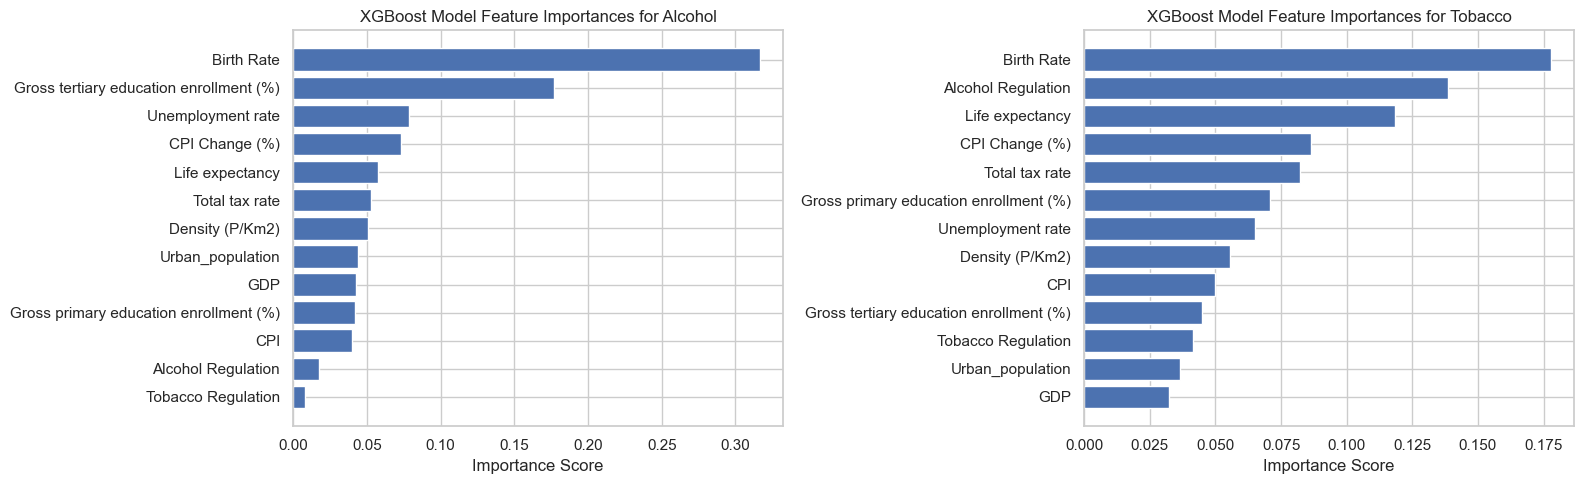

In [28]:
importances_alc = gs_alc.best_estimator_.feature_importances_
importances_tob = gs_tob.best_estimator_.feature_importances_

importances_alc_df = pd.DataFrame({"feature" : x.columns, "importance" : importances_alc}).sort_values("importance", ascending=False)
importances_tob_df = pd.DataFrame({"feature" : x.columns, "importance" : importances_tob}).sort_values("importance", ascending=False)

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.barh(importances_alc_df["feature"],importances_alc_df["importance"])
plt.gca().invert_yaxis()
plt.title("XGBoost Model Feature Importances for Alcohol")
plt.xlabel("Importance Score")
plt.subplot(1,2,2)
plt.barh(importances_tob_df["feature"],importances_tob_df["importance"])
plt.gca().invert_yaxis()
plt.title("XGBoost Model Feature Importances for Tobacco")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()